In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

import os

from scipy.special import comb

In [2]:
from lib import enm_proba_exact
from lib import enm_proba_apprx

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
SEED = 8098
np.random.seed(SEED)

### Data

In [28]:
N0 = 5
N1 = 5

In [29]:
X0 = np.random.multivariate_normal(
    [0, 0],
    [[1, 0], [0, 1]],
    size=N0
)
y0 = np.zeros(N0, dtype=int) + 0

X1 = np.random.multivariate_normal(
    [0, 0],
    [[1, 0], [0, 1]],
    size=N1
)
y1 = np.zeros(N1, dtype=int) + 1

X = np.vstack([X0, X1], dtype=np.float32)
y = np.concatenate([y0, y1], dtype=np.int32)

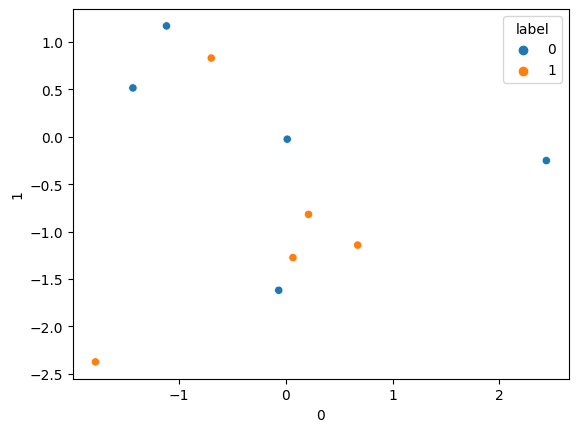

In [30]:
plot_df = pd.DataFrame(data=X)
plot_df["label"] = y

fig, ax = plt.subplots()

sns.scatterplot(data=plot_df,
                x=0,
                y=1,
                hue="label",
                ax=ax);

### Params

In [31]:
N_THREADS = 64
K = 0

In [32]:
nom, den = enm_proba_exact(X, y, K, N_THREADS)
print(nom, den, nom / den)

12 252 0.047619047619047616


{  0.0%} [                                        ] (0.0s < infs) 
{  0.0%} [                                        ] (0.0s < infs) 


In [33]:
nom, den = enm_proba_apprx(X, y, K, 1e-2, N_THREADS)
print(nom, den, nom / den)

454 9985 0.045468202303455184


{ 87.3%} [###################################     ] (1.1s < 0.2s) 
{  0.0%} [                                        ] (0.0s < infs) 


In [34]:
print(np.sqrt(2) * (N0 + N1) / (comb(N0 + N1, N0)))

0.056119585808456156
